In [1]:
import sys
sys.path.append('../')

import logging
import numpy as np
import matplotlib
import pylab as plt

import hallgerd
from hallgerd.core import Sequential
from hallgerd.layers import Dense
from gunnar.core import Device

import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /= 255
x_test /= 255

x_test = x_test.T
x_train = x_train.T
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_train = y_train.T
y_test = y_test.T

In [3]:
x_train.shape, y_train.shape

((784, 60000), (10, 60000))

9


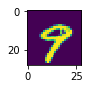

In [4]:
print(y_test[:,9].argmax(axis=0))
plt.figure(figsize=(1,1))
plt.imshow(x_test[:,9].reshape((28,28)))
plt.show()

In [5]:
x_train[:,:3000].shape

(784, 3000)

In [6]:
devices = Device.getDevices()
cldevice = Device([devices['Intel(R) Gen9 HD Graphics NEO']])

model = Sequential(cldevice, lr=1e-3, batch_size=256, epochs=20, loss='cross_entropy', verbose=True)
model.add(Dense(784, 512, activation='relu'))
model.add(Dense(512, 512, activation='relu'))
model.add(Dense(512, 10, activation='softmax'))
model.fit(x_train[:,:3000], y_train[:,:3000])

100%|██████████| 20/20 [00:10<00:00,  2.00it/s]


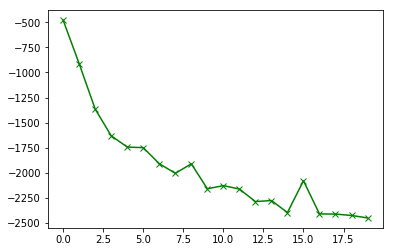

In [7]:
plt.plot(model.history['loss'], 'gx-')
plt.show()

true:  9
pred:  [9]


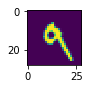

In [8]:
I = 7

print('true: ', y_test[:,I].argmax(axis=0))
print('pred: ', model(x_test[:,I:I+1]).argmax(axis=0))
plt.figure(figsize=(1,1))
plt.imshow(x_test[:,I].reshape((28,28)))
plt.show()

In [9]:
from sklearn.metrics import classification_report
yt = y_test.argmax(axis=0)
ypp = model(x_test)
yp = ypp.argmax(axis=0)
print(classification_report(yt, yp))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       980
           1       0.92      0.98      0.95      1135
           2       0.82      0.86      0.84      1032
           3       0.99      0.57      0.72      1010
           4       0.78      0.95      0.85       982
           5       0.76      0.80      0.78       892
           6       0.94      0.85      0.89       958
           7       0.85      0.91      0.88      1028
           8       0.77      0.87      0.81       974
           9       0.92      0.77      0.84      1009

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000

